In [3]:
import heapq
from graphviz import Graph
from IPython.display import Image, display
from tabulate import tabulate

class MSTPrim:
    def __init__(self, lag):
        self.grafo = lag
        self.mst = []
        self.costoTotal = 0
        
    def dibujaGrafo(self) -> Image:
        dibujo = Graph(format='png')
        dibujo.graph_attr['rankdir'] = 'LR'
        # Add nodes
        for nodo in self.grafo.keys():
            dibujo.node(nodo, color='red')
        # Add edges
        for nodo, vecinos in self.grafo.items():
            for vecino, peso in vecinos.items():
                if nodo < vecino:  # Avoid duplicate edges
                    label = f"Peso: {peso}"
                    dibujo.edge(nodo, vecino, label=label, color='green1')
        # Generate image in memory (as bytes) without saving to a file
        img_bytes = dibujo.pipe(format='png')
        return Image(img_bytes)  # Display the image from bytes
    
    # Drawing the MST
    def dibujaMST(self) -> Image:
        dibujo = Graph(format='png')
        dibujo.graph_attr['rankdir'] = 'LR'
        # Convert the MST to a set of edge tuples for quick lookup
        mst_edges = {(min(tripleta[0], tripleta[1]), max(tripleta[0], tripleta[1])) for tripleta in self.mst}
        
        # Add nodes
        for nodo in self.grafo.keys():
            dibujo.node(nodo, color='red')
        
        # Add edges
        for nodo, vecinos in self.grafo.items():
            for vecino, peso in vecinos.items():
                # Ensure each edge is only drawn once
                if nodo < vecino:
                    edge_tuple = (nodo, vecino)
                    label = f"Peso: {peso}"
                    
                    # Check if the edge is in the MST, and color it differently
                    if edge_tuple in mst_edges:
                        dibujo.edge(nodo, vecino, label=label, color='blue', penwidth='2.0')  # Highlight MST edges
                    else:
                        dibujo.edge(nodo, vecino, label=label, color='green1')  # Non-MST edges
        
        # Add total cost label
        dibujo.attr(label=f"Costo Total del MST: {self.costoTotal}", fontsize='20', color='black')
                
        # Generate image in memory
        img_bytes = dibujo.pipe(format='png')
        return Image(img_bytes)
    
    def Prim(self):
        self.mst = []
        self.costoTotal = 0
        nodoInicio = list(self.grafo.keys())[3]  # nodo 3
        visitados = set([nodoInicio])  # conjunto para llevar el control de los nodos visitados
        aristas = [(peso, nodoInicio, vecino) for vecino, peso in self.grafo[nodoInicio].items()]
        heapq.heapify(aristas)  # amontonamiento para formar una cola de prioridad
        
        while aristas:
            valorArista, nodo, nodoVecino = heapq.heappop(aristas)
            if nodoVecino not in visitados:
                visitados.add(nodoVecino)
                self.mst.append((nodo, nodoVecino, valorArista))
                self.costoTotal += valorArista
                for siguienteNodoVecino, siguientePeso in self.grafo[nodoVecino].items():
                    if siguienteNodoVecino not in visitados:
                        heapq.heappush(aristas, (siguientePeso, nodoVecino, siguienteNodoVecino))
    
    def getMST(self):
        return self.mst
    
    def getCostoTotal(self):
        return self.costoTotal
    
    def imprimeConexiones(self):
        conexiones = []
        for nodo, vecinos in self.grafo.items():
            for vecino, peso in vecinos.items():
                conexiones.append([nodo, vecino, peso])
        
        print(tabulate(conexiones, headers=["Nodo", "Vecino", "Peso"], tablefmt="grid"))
        
    def imprimeConexionesMST(self):
        conexiones_mst = []
        for nodo1, nodo2, peso in self.mst:
            conexiones_mst.append([nodo1, nodo2, peso])
        
        print(tabulate(conexiones_mst, headers=["Nodo 1", "Nodo 2", "Peso"], tablefmt="grid"))

grafo = {
    '0': {'1': 7, '2': 1, '3': 1},
    '1': {'0': 7, '2': 6, '3': 3, '5': 1},
    '2': {'0': 1, '1': 6, '6': 8},
    '3': {'0': 1, '1': 3, '5': 8, '7': 9},
    '4': {'6': 6},
    '5': {'3': 8, '7': 3, '1': 1},
    '6': {'1': 6, '2': 8, '4': 6, '7': 2},
    '7': {'3': 9, '5': 3, '6': 2}
}



# Crear el objeto MSTPrim
mst = MSTPrim(grafo)


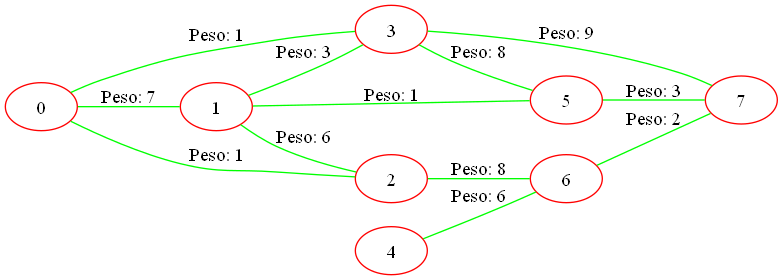

In [4]:
grafo_original = mst.dibujaGrafo()
display(grafo_original)

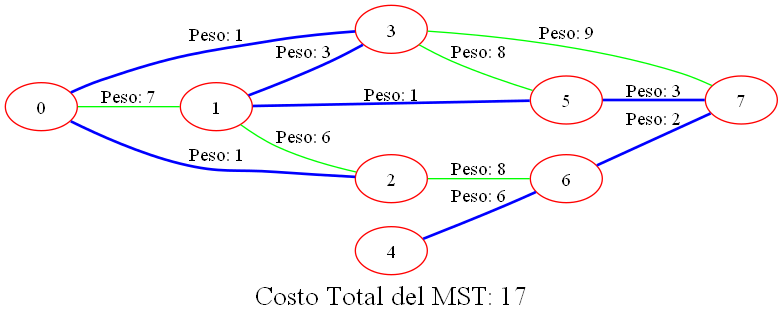

In [5]:
mst.Prim()
mst.dibujaMST()